In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
import mpl_toolkits as mpl
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
%matplotlib notebook

In [2]:
def tau(u):
    return -np.log(1-u)

def mu(u):
    return 2*u-1

def phi(u):
    return 2*np.pi*u

In [3]:
def RT_positions(m, p, z_max=1, tau_max=10, prob=1, nsteps=25):
    positions = np.zeros((m.size, 3, nsteps+1))
    absorbed = np.full(m.size, False)
    
    for i in range(1, nsteps+1):
        t = tau(np.random.rand(*m.shape))
        L = t*z_max/tau_max
        theta = np.arccos(m)
        
        absorbed |= np.random.rand(m.size) <= 1-prob
        dead_mask = positions[:,2,i-1] > z_max
        dead_mask |= absorbed
        dead_mask |= positions[:,2,i-1] < 0
        not_dead_mask = np.logical_not(dead_mask)

        positions[not_dead_mask,0,i] = positions[not_dead_mask,0,i-1] \
                                        + (L*np.sin(theta)*np.cos(p))[not_dead_mask]
        positions[not_dead_mask,1,i] = positions[not_dead_mask,1,i-1] \
                                        + (L*np.sin(theta)*np.sin(p))[not_dead_mask]
        positions[not_dead_mask,2,i] = positions[not_dead_mask,2,i-1] \
                                        + (L*np.cos(theta))[not_dead_mask]
        
        # This will halt any particles that don't make it through 
        positions[dead_mask,0,i] = positions[dead_mask,0,i-1]
        positions[dead_mask,1,i] = positions[dead_mask,1,i-1]
        positions[dead_mask,2,i] = positions[dead_mask,2,i-1]

        m, p = mu(np.random.rand(*m.shape)), phi(np.random.rand(*m.shape))

    return positions

def update_lines(num, dataLines, lines):
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

def generate_plot_object():
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # NOTE: Can't pass empty arrays into 3d version of plot()
    lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

    # Setting the axes properties
    ax.set_xlim3d([-1.5, 1.5])
    ax.set_xlabel('X')

    ax.set_ylim3d([-1.5, 1.5])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0.0, 1.0])
    ax.set_zlabel('Z')

    ax.set_title('3D Test')
    return fig, lines

<IPython.core.display.Javascript object>


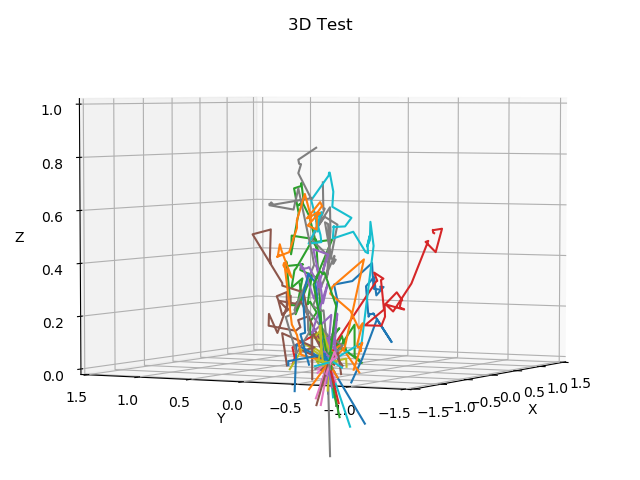

In [4]:
nframes = 50
nparticles = 100
m, p = mu(np.random.rand(nparticles)), phi(np.random.rand(nparticles))
data = RT_positions(m, p, nsteps=nframes)

fig, lines = generate_plot_object()

line_ani = animation.FuncAnimation(fig, update_lines, nframes, fargs=(data, lines),
                                   interval=100, blit=True)

# Uncomment these lines to save the animation. 
# Please make sure that you download ffmpeg and then set the pointer to the correct location for your system
#plt.rcParams['animation.ffmpeg_path'] = '/home/nathan.meulenbroek/miniconda3/bin'
#line_ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])